# **SATRIA DATA 2025**

**Team Ihre einzige grenze ist ihr verstand**

## **Data Understanding**

### 1. Deskripsi Dataset

Dataset yang digunakan berasal dari **kompetisi Satria Data 2025 (Big Data Challenge)**, dengan fokus pada **analisis emosi manusia**.
Dataset ini berisi kumpulan data video dan label emosi.

* **Sumber data**: panitia kompetisi Satria Data.
* **Format**: CSV.
* **Jumlah record**: 803.
* **Tujuan utama**: membangun model machine learning untuk mengklasifikasikan emosi berdasarkan fitur yang tersedia.

### 2. Struktur Data

Berdasarkan inspeksi awal, dataset memiliki beberapa kolom penting, di antaranya:

* `id` → ID unik untuk setiap data.
* `video` → URL video yang menjadi sumber data.
* `emotion_clean` → Label emosi (target variabel).
* Kolom tambahan (fitur numerik/kategorikal lainnya) yang akan digunakan dalam analisis.

### 3. Kualitas Data

* **Missing values**: terdapat sejumlah nilai kosong di beberapa kolom yang perlu ditangani.
* **Duplikasi**: terdapat kemungkinan duplikasi data pada kolom `video`.
* **Konsistensi**: kolom URL video memiliki format yang tidak seragam, sehingga perlu dilakukan normalisasi.

### 4. Label Emosi

Label target (`emotion_clean`) direpresentasikan dalam bentuk angka 0–7 dengan arti sebagai berikut:

| Label | Emosi    |
| ----- | -------- |
| 0     | Proud    |
| 1     | Trust    |
| 2     | Joy      |
| 3     | Surprise |
| 4     | Neutral  |
| 5     | Sadness  |
| 6     | Fear     |
| 7     | Anger    |

### 5. Korelasi dan Pola Awal

* Fitur numerik tertentu menunjukkan adanya korelasi satu sama lain.
* Video yang sama bisa muncul di dataset train dan test, sehingga perlu diperhatikan agar tidak terjadi **data leakage**.
* Insight awal: distribusi label yang tidak seimbang bisa memengaruhi performa model baseline.

### 6. Kesimpulan Sementara

* Dataset memiliki informasi yang cukup untuk membangun model klasifikasi emosi.
* Terdapat potensi masalah **missing values, duplikasi, dan imbalance data**.
* Tahap berikutnya adalah melakukan **data preparation**: pembersihan, transformasi, dan rekayasa fitur sebelum modeling.

## **Data Preparation**

### A. Analisis Awal

#### 1. Load Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data/datatrain.csv")

print("🔹 Dataset shape:", df.shape)
print("🔹 Kolom yang tersedia:", df.columns.tolist())
print(df.head())

🔹 Dataset shape: (803, 3)
🔹 Kolom yang tersedia: ['id', 'video', 'emotion']
   id                                              video   emotion
0   1  https://www.instagram.com/reel/DNKcHgdA-d1/?ig...  Surprise
1   2  https://www.instagram.com/reel/DNHwrh2gnBm/?ig...  Surprise
2   3  https://www.instagram.com/reel/DM7QsjnRCoa/?ig...  Surprise
3   4  https://www.instagram.com/reel/DNBBEt6Paxj/?ig...  Surprise
4   5  https://www.instagram.com/reel/DMz13fQzZsN/?ig...     Proud


#### 2. Cek Missing Values

In [7]:
print("\n🔹 Missing Values per Kolom:")
print(df.isna().sum())


🔹 Missing Values per Kolom:
id         0
video      0
emotion    0
dtype: int64


#### 3. Cek Duplikasi

In [8]:
total_duplicates = df.duplicated().sum()
video_duplicates = df['video'].duplicated().sum() if 'video' in df.columns else 0

print(f"\n🔹 Total Baris Duplikat: {total_duplicates}")
print(f"🔹 Duplikat pada Kolom video: {video_duplicates}")
print(f"🔹 Jumlah URL unik: {df['video'].nunique()}")


🔹 Total Baris Duplikat: 0
🔹 Duplikat pada Kolom video: 27
🔹 Jumlah URL unik: 776


#### 4. Mapping Canonical Labels

In [9]:
CANONICAL = {
    'surprise': 'Surprise',
    'terkejut': 'Surprise',
    'trkejut': 'Surprise',
    'kaget': 'Surprise',
    'trekejut': 'Surprise',
    'terkjut': 'Surprise',

    'joy': 'Joy',
    'happy': 'Joy',

    'trust': 'Trust',
    'faith': 'Trust',
    'loyalty': 'Trust',
    'percaya': 'Trust',
    'percaya ': 'Trust',

    'proud': 'Proud',
    'pride': 'Proud',
    'bangga': 'Proud',
    'love': 'Proud',

    'sadness': 'Sadness',
    'sad': 'Sadness',

    'anger': 'Anger',
    'angry': 'Anger',
    'marah': 'Anger',
    'marh': 'Anger',

    'fear': 'Fear',

    'neutral': 'Neutral'
}

# Normalisasi label
df['emotion_clean'] = df['emotion'].str.lower().str.strip().map(CANONICAL)
df['emotion_clean'].fillna(df['emotion'], inplace=True)

#### 5. Distribusi Label

In [10]:
label_distribution = (
    df['emotion_clean']
    .value_counts()
    .to_frame()
    .reset_index()
)
label_distribution.columns = ['Emotion', 'Count']
label_distribution['Percentage'] = (label_distribution['Count'] / len(df) * 100).round(2)

print("\n🔹 Distribusi Label Emosi:")
print(label_distribution)


🔹 Distribusi Label Emosi:
    Emotion  Count  Percentage
0  Surprise    331       41.22
1     Trust    184       22.91
2     Proud    157       19.55
3       Joy     53        6.60
4     Anger     36        4.48
5   Sadness     18        2.24
6      Fear     16        1.99
7   Neutral      8        1.00


#### 6. Visualisasi Distribusi

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(data=label_distribution, x="Emotion", y="Count", palette="Set2")
plt.title("Distribusi Label Emosi")
plt.xticks(rotation=45)
plt.show()

#### 7. Insight Awal

In [7]:
print("\n🔹 Insight Awal:")
print("- Dataset memiliki", len(df), "baris data")
print("- Jumlah missing values relatif kecil/besar tergantung hasil di atas")
print("- Ada", total_duplicates, "baris duplikat")
print("- Ada", video_duplicates, "URL video duplikat")
print("- Label paling dominan:", label_distribution.iloc[0,0], 
      "dengan", label_distribution.iloc[0,1], "sampel (", label_distribution.iloc[0,2], "% )")
print("- Terdapat indikasi class imbalance, terutama pada kelas minoritas (Neutral, Fear, Sadness)")


🔹 Insight Awal:
- Dataset memiliki 803 baris data
- Jumlah missing values relatif kecil/besar tergantung hasil di atas
- Ada 0 baris duplikat
- Ada 27 URL video duplikat
- Label paling dominan: Surprise dengan 331 sampel ( 41.22 % )
- Terdapat indikasi class imbalance, terutama pada kelas minoritas (Neutral, Fear, Sadness)


### B. Analisis Lanjutan

#### 1. Class Imbalance


🔹 Distribusi Label Emosi
    Emotion  Count  Percentage
0  Surprise    331       41.22
1     Trust    184       22.91
2     Proud    157       19.55
3       Joy     53        6.60
4     Anger     36        4.48
5   Sadness     18        2.24
6      Fear     16        1.99
7   Neutral      8        1.00


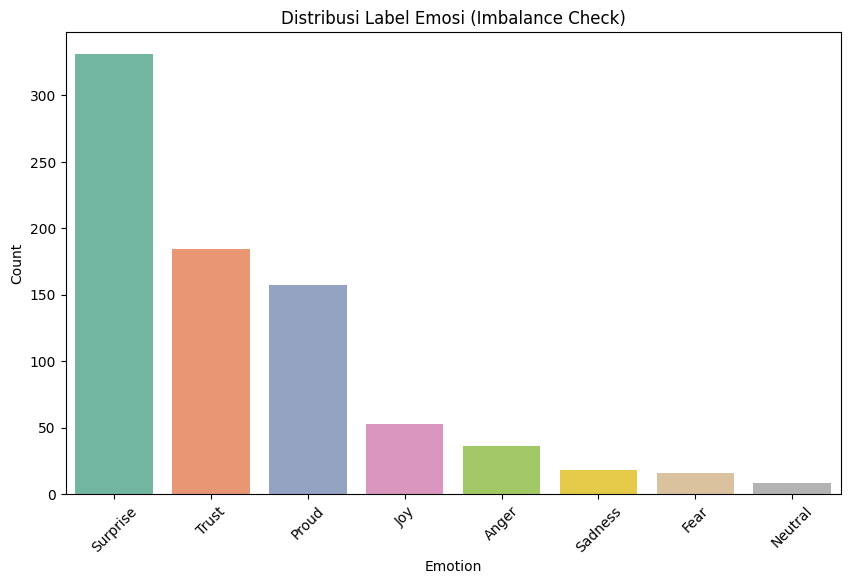

In [8]:
label_dist = df['emotion_clean'].value_counts().to_frame().reset_index()
label_dist.columns = ['Emotion', 'Count']
label_dist['Percentage'] = (label_dist['Count'] / len(df) * 100).round(2)

print("\n🔹 Distribusi Label Emosi")
print(label_dist)

plt.figure(figsize=(10,6))
sns.barplot(data=label_dist, x="Emotion", y="Count", palette="Set2")
plt.title("Distribusi Label Emosi (Imbalance Check)")
plt.xticks(rotation=45)
plt.show()

#### 2. Duplikasi URL Video

In [9]:
dupes = df[df['video'].duplicated(keep=False)].sort_values("video")
print("\n🔹 Contoh Duplikat URL Video:")
print(dupes.head(10))

print(f"\nTotal URL duplikat: {df['video'].duplicated().sum()}")
print(f"Jumlah URL unik: {df['video'].nunique()}")


🔹 Contoh Duplikat URL Video:
    id                                              video   emotion  \
74  75  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Proud   
75  76  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Trust   
88  89  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Trust   
89  90  https://drive.google.com/file/d/12YBpn9zWc_3Ff...      Fear   
90  91  https://drive.google.com/file/d/12YBpn9zWc_3Ff...   Neutral   
91  92  https://drive.google.com/file/d/12YBpn9zWc_3Ff...  Surprise   
92  93  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Proud   
93  94  https://drive.google.com/file/d/12YBpn9zWc_3Ff...  Surprise   
94  95  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Trust   
95  96  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Proud   

   emotion_clean  
74         Proud  
75         Trust  
88         Trust  
89          Fear  
90       Neutral  
91      Surprise  
92         Proud  
93      Surprise  
94         Trust 

#### 3. Mayoritas vs Minoritas


🔹 Persentase Mayoritas vs Minoritas
group
Mayoritas    83.686177
Minoritas    16.313823
Name: proportion, dtype: float64


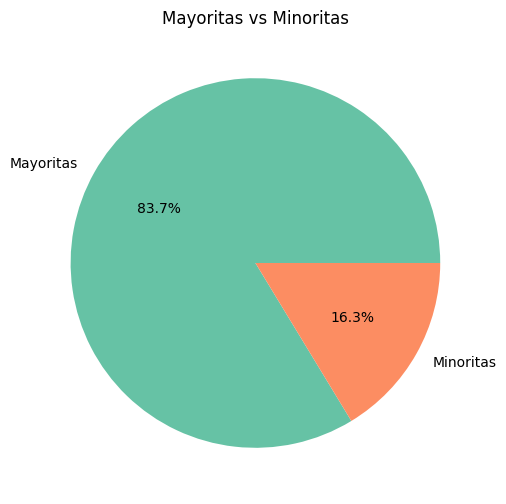

In [10]:
major = ["Surprise", "Trust", "Proud"]
df['group'] = df['emotion_clean'].apply(lambda x: "Mayoritas" if x in major else "Minoritas")

group_dist = df['group'].value_counts(normalize=True) * 100
print("\n🔹 Persentase Mayoritas vs Minoritas")
print(group_dist)

plt.figure(figsize=(6,6))
df['group'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#66c2a5","#fc8d62"])
plt.title("Mayoritas vs Minoritas")
plt.ylabel("")
plt.show()

#### 4. Cek Akses URL

In [11]:
import pandas as pd
import requests
import random
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# List User-Agent agar mirip browser sungguhan
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
    "(KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
    "AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.4 Safari/605.1.15",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
    "(KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
]

session = requests.Session()

def check_url(url):
    headers = {"User-Agent": random.choice(USER_AGENTS)}
    try:
        response = session.get(url, headers=headers, allow_redirects=True, timeout=10)

        if response.status_code == 200:
            return "Accessible"
        elif response.status_code in [301, 302]:
            return "Redirect"
        elif response.status_code == 403:
            return "Forbidden (Need Login/Permission)"
        elif response.status_code == 429:
            return "Rate Limited"
        elif response.status_code == 404:
            return "Not Found (Expired)"
        else:
            return f"Error {response.status_code}"

    except requests.RequestException:
        return "Request Failed"

# ==== Versi Parallel dengan ThreadPoolExecutor ====
def process_urls(df, max_workers=20):
    results = {}
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_url = {executor.submit(check_url, url): url for url in df['video']}
        for future in tqdm(as_completed(future_to_url), total=len(future_to_url), desc="Checking URLs"):
            url = future_to_url[future]
            try:
                results[url] = future.result()
            except Exception:
                results[url] = "Request Failed"
    df['status_check'] = df['video'].map(results)
    return df

# Jalankan
df = process_urls(df, max_workers=20)

print("\n🔹 Ringkasan Hasil:")
print(df['status_check'].value_counts())

Checking URLs: 100%|██████████| 803/803 [01:00<00:00, 13.32it/s]


🔹 Ringkasan Hasil:
status_check
Accessible                           781
Forbidden (Need Login/Permission)     21
Error 401                              1
Name: count, dtype: int64


## **Data Preprocessing**

### Menghapus URL Error

In [12]:
# Buat daftar status yang mau dihapus
remove_status = [
    "Request Failed",
    "Forbidden (Need Login/Permission)"
]

# Hapus juga semua status yang mengandung kata "Error"
mask_error = df['status_check'].str.contains("Error", na=False)

# Gabungkan kondisi
df_clean = df[~df['status_check'].isin(remove_status) & ~mask_error].copy()

print("\n🔹 Ringkasan setelah dibersihkan:")
print(df_clean['status_check'].value_counts())

# Kalau mau overwrite df lama:
df = df_clean


🔹 Ringkasan setelah dibersihkan:
status_check
Accessible    781
Name: count, dtype: int64


### Menghapus Duplikasi

In [13]:
df = df.drop_duplicates(subset=["video"])

### Mendownload Data Video

In [14]:
import os
import re
import gdown
import subprocess
import pandas as pd
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# Pastikan folder video ada
os.makedirs("data/train/video", exist_ok=True)

def clean_incomplete():
    """Hapus file .part (download gagal/tidak selesai)."""
    removed = []
    for f in os.listdir("data/train/video"):
        if f.endswith(".part"):
            os.remove(os.path.join("data/train/video", f))
            removed.append(f)
    return removed

def download_drive(file_id, output_path):
    try:
        gdown.download(id=file_id, output=output_path, quiet=True)
        return True
    except Exception as e:
        return f"Gagal Google Drive {file_id}: {e}"

def download_instagram(url, output_path):
    try:
        cmd = ["yt-dlp", "-o", output_path, url]
        subprocess.run(cmd, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        return True
    except Exception as e:
        return f"Gagal Instagram {url}: {e}"

def download_one(row):
    url = row["video"]
    file_id = str(row["id"])
    output_path = os.path.join("data/train/video", f"{file_id}.mp4")

    # Skip kalau sudah ada
    if os.path.exists(output_path):
        return f"Skip {file_id}"

    if "drive.google.com" in url:
        match = re.search(r"/d/([^/]+)", url)
        gdrive_id = match.group(1) if match else None
        if gdrive_id:
            return download_drive(gdrive_id, output_path)
    elif "instagram" in url:
        return download_instagram(url, output_path)
    else:
        return f"URL tidak dikenali: {url}"

def download_videos(df, max_workers=10):
    # Step 1: hapus .part
    removed = clean_incomplete()
    if removed:
        print(f"🗑️ Menghapus file .part: {len(removed)}")

    # Step 2: skip id yang sudah ada
    downloaded_ids = {
        f.split(".")[0] for f in os.listdir("data/train/video") if f.endswith(".mp4")
    }
    df_todo = df[~df["id"].astype(str).isin(downloaded_ids)].copy()

    print(f"📌 Total video di data : {len(df)}")
    print(f"✅ Sudah ada           : {len(downloaded_ids)}")
    print(f"⬇️ Akan didownload     : {len(df_todo)}")

    results = []
    if not df_todo.empty:
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            futures = [executor.submit(download_one, row) for _, row in df_todo.iterrows()]
            for f in tqdm(as_completed(futures), total=len(futures), desc="Downloading videos"):
                results.append(f.result())
    return results

hasil = download_videos(df, max_workers=8)

📌 Total video di data : 755
✅ Sudah ada           : 753
⬇️ Akan didownload     : 2


In [15]:
# Cek jumlah file akhir
final_count = len([f for f in os.listdir("data/train/video") if f.endswith(".mp4")])
print(f"\n🎯 Jumlah file video final: {final_count} dari {len(df)} data")


🎯 Jumlah file video final: 753 dari 755 data


In [16]:
# Ambil semua id yang berhasil di-download (file .mp4 ada di folder)
downloaded_ids = {
    f.split(".")[0] for f in os.listdir("data/train/video") if f.endswith(".mp4")
}

# Cari data yang tidak ada filenya
df_missing = df[~df["id"].astype(str).isin(downloaded_ids)].copy()

print(f"❌ Jumlah video gagal: {len(df_missing)}")
print("\n🔎 Contoh data yang gagal:")
print(df_missing.head())

# Opsional: cek distribusi sumber (Instagram / Drive)
df_missing["source"] = df_missing["video"].apply(
    lambda x: "Google Drive" if "drive.google.com" in x else
              "Instagram" if "instagram.com/reel" in x else "Other"
)
print("\n📊 Distribusi sumber video yang gagal:")
print(df_missing["source"].value_counts())


❌ Jumlah video gagal: 2

🔎 Contoh data yang gagal:
      id                                              video   emotion  \
459  460  https://www.instagram.com/reel/DLUesJ4RTin/?ut...     Trust   
795  796  https://www.instagram.com/reel/DMVRWpmTqUC/?ig...  Surprise   

    emotion_clean      group status_check  
459         Trust  Mayoritas   Accessible  
795      Surprise  Mayoritas   Accessible  

📊 Distribusi sumber video yang gagal:
source
Instagram    2
Name: count, dtype: int64


In [17]:
video_dir = "data/train/video"

# ambil semua id video yang sudah sukses didownload (ekstensi .mp4)
downloaded_ids = {os.path.splitext(f)[0] for f in os.listdir(video_dir) if f.endswith(".mp4")}

# filter hanya baris yang id-nya ada di downloaded_ids
df_downloaded = df[df['id'].astype(str).isin(downloaded_ids)].copy()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data setelah filter (hanya yang terunduh): {len(df_downloaded)}")
print(f"Jumlah data gagal (dihapus): {len(df) - len(df_downloaded)}")

Jumlah data awal: 755
Jumlah data setelah filter (hanya yang terunduh): 753
Jumlah data gagal (dihapus): 2


### Menyimpan ke Drive

In [ ]:
import os
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive

# --- autentikasi ---
gauth = GoogleAuth()
gauth.LocalWebserverAuth()  # akan buka browser untuk login Google
drive = GoogleDrive(gauth)

# --- tentukan folder di Google Drive ---
folder_id = "1doDmLnv1T6yBHvC78nZrYQ4KYfCWj0BM"

# --- upload semua video ---
video_dir = "data/video"

for fname in os.listdir(video_dir):
    if fname.endswith(".mp4"):
        file_path = os.path.join(video_dir, fname)
        gfile = drive.CreateFile({
            'title': fname,
            'parents': [{'id': folder_id}] if folder_id else []
        })
        gfile.SetContentFile(file_path)
        gfile.Upload()
        print(f"✅ Uploaded {fname}")

### Melakukan Ekstrak Audio

In [19]:
import os
import subprocess
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

video_dir = "data/train/video"
audio_dir = "data/train/audio"
os.makedirs(audio_dir, exist_ok=True)

def convert_to_audio(video_file):
    video_path = os.path.join(video_dir, video_file)
    audio_path = os.path.join(audio_dir, os.path.splitext(video_file)[0] + ".mp3")

    # Skip kalau audio sudah ada
    if os.path.exists(audio_path):
        return (video_file, "⏭️ skipped (sudah ada)")

    try:
        # ffmpeg extract audio (cepat & efisien)
        cmd = [
            "ffmpeg", "-y", "-i", video_path,
            "-vn", "-acodec", "mp3", audio_path
        ]
        subprocess.run(cmd, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=True)
        return (video_file, "✅ success")
    except Exception as e:
        return (video_file, f"❌ gagal: {e}")

# Ambil semua file video
video_files = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]

results = []
with ThreadPoolExecutor(max_workers=8) as executor:  # sesuaikan jumlah core
    futures = {executor.submit(convert_to_audio, f): f for f in video_files}
    for future in tqdm(as_completed(futures), total=len(futures), desc="Converting"):
        results.append(future.result())

# Ringkasan hasil
for fname, status in results:
    print(f"{fname}: {status}")

print("🎯 Proses konversi selesai.")


Converting: 100%|██████████| 753/753 [00:00<00:00, 14885.97it/s]

142.mp4: ⏭️ skipped (sudah ada)
107.mp4: ⏭️ skipped (sudah ada)
127.mp4: ⏭️ skipped (sudah ada)
12.mp4: ⏭️ skipped (sudah ada)
112.mp4: ⏭️ skipped (sudah ada)
134.mp4: ⏭️ skipped (sudah ada)
108.mp4: ⏭️ skipped (sudah ada)
106.mp4: ⏭️ skipped (sudah ada)
141.mp4: ⏭️ skipped (sudah ada)
103.mp4: ⏭️ skipped (sudah ada)
126.mp4: ⏭️ skipped (sudah ada)
149.mp4: ⏭️ skipped (sudah ada)
133.mp4: ⏭️ skipped (sudah ada)
140.mp4: ⏭️ skipped (sudah ada)
125.mp4: ⏭️ skipped (sudah ada)
132.mp4: ⏭️ skipped (sudah ada)
14.mp4: ⏭️ skipped (sudah ada)
119.mp4: ⏭️ skipped (sudah ada)
124.mp4: ⏭️ skipped (sudah ada)
147.mp4: ⏭️ skipped (sudah ada)
131.mp4: ⏭️ skipped (sudah ada)
114.mp4: ⏭️ skipped (sudah ada)
122.mp4: ⏭️ skipped (sudah ada)
154.mp4: ⏭️ skipped (sudah ada)
111.mp4: ⏭️ skipped (sudah ada)
139.mp4: ⏭️ skipped (sudah ada)
146.mp4: ⏭️ skipped (sudah ada)
117.mp4: ⏭️ skipped (sudah ada)
11.mp4: ⏭️ skipped (sudah ada)
130.mp4: ⏭️ skipped (sudah ada)
153.mp4: ⏭️ skipped (sudah ada)
138.mp4: ⏭️

In [20]:
# Ambil semua id video (tanpa ekstensi)
video_ids = {os.path.splitext(f)[0] for f in os.listdir(video_dir) if f.endswith(".mp4")}
audio_ids = {os.path.splitext(f)[0] for f in os.listdir(audio_dir) if f.endswith(".mp3")}

missing = video_ids - audio_ids
extra = audio_ids - video_ids

print("📊 Ringkasan Konversi:")
print(f"🎥 Jumlah video : {len(video_ids)}")
print(f"🎵 Jumlah audio : {len(audio_ids)}")

if not missing:
    print("✅ Semua video sudah dikonversi ke audio")
else:
    print(f"⚠️ Belum semua terkonversi, {len(missing)} video belum ada audio-nya.")
    print("Contoh ID yang belum terkonversi:", list(missing)[:10])

if extra:
    print(f"ℹ️ Ada {len(extra)} audio tanpa video terkait (mungkin file sisa lama).")


📊 Ringkasan Konversi:
🎥 Jumlah video : 753
🎵 Jumlah audio : 753
✅ Semua video sudah dikonversi ke audio


### Melakukan Ekstrak Teks

In [21]:
import os
import whisper
from tqdm import tqdm

audio_dir = "data/train/audio"
text_dir = "data/train/text"
os.makedirs(text_dir, exist_ok=True)

# Pilih model yang ringan
model = whisper.load_model("small", device="cpu")

# Ambil semua file audio
files = [f for f in os.listdir(audio_dir) if f.endswith(".mp3")]

ok, skip, fail = [], [], []

for fname in tqdm(files, desc="Transcribing"):
    audio_path = os.path.join(audio_dir, fname)
    txt_path = os.path.join(text_dir, os.path.splitext(fname)[0] + ".txt")

    # Skip kalau sudah ada hasil
    if os.path.exists(txt_path):
        skip.append(fname)
        continue

    try:
        result = model.transcribe(audio_path, language="id", fp16=False)
        with open(txt_path, "w", encoding="utf-8") as f:
            f.write(result["text"].strip())
        ok.append(fname)
    except Exception as e:
        fail.append((fname, str(e)))

# Ringkasan
print("\n📊 Ringkasan:")
print(f"✅ Berhasil transkrip : {len(ok)}")
print(f"⏭️ Sudah ada (skip)   : {len(skip)}")
print(f"❌ Gagal transkrip    : {len(fail)}")

if fail:
    print("\n🔎 Contoh error:")
    for f, e in fail[:5]:
        print(f"- {f}: {e}")

Transcribing: 100%|██████████| 753/753 [00:00<00:00, 9196.67it/s]


📊 Ringkasan:
✅ Berhasil transkrip : 0
⏭️ Sudah ada (skip)   : 753
❌ Gagal transkrip    : 0


### Membuat Pipeline Datatest

In [22]:
import os
import subprocess
import pandas as pd
from tqdm import tqdm
import whisper

# === Path setup ===
csv_path = "data/datatest.csv"
base_dir = "data/test"
video_dir = os.path.join(base_dir, "video")
audio_dir = os.path.join(base_dir, "audio")
text_dir = os.path.join(base_dir, "text")

for d in [video_dir, audio_dir, text_dir]:
    os.makedirs(d, exist_ok=True)

# === Load dataset ===
test_df = pd.read_csv(csv_path)

# === Load Whisper model ===
# Pilih sesuai kebutuhan: tiny/base/small/medium/large
model = whisper.load_model("small", device="cpu")

# === 1. Download video ===
for _, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Downloading videos"):
    vid_id, url = str(row["id"]), row["video"]
    video_path = os.path.join(video_dir, f"{vid_id}.mp4")

    # skip jika file video sudah ada
    if os.path.exists(video_path):
        continue

    try:
        subprocess.run(
            ["yt-dlp", "-o", video_path, url],
            check=True,
            capture_output=True
        )
    except subprocess.CalledProcessError as e:
        print(f"❌ Gagal download {url}: {e.stderr.decode(errors='ignore')}")

# === 2. Extract audio ===
for fname in tqdm(os.listdir(video_dir), desc="Extracting audio"):
    if not fname.endswith(".mp4"):
        continue
    vid_id = os.path.splitext(fname)[0]
    video_path = os.path.join(video_dir, fname)
    audio_path = os.path.join(audio_dir, f"{vid_id}.mp3")

    # skip jika file audio sudah ada
    if os.path.exists(audio_path):
        continue

    try:
        subprocess.run(
            ["ffmpeg", "-y", "-i", video_path, "-vn", "-acodec", "mp3", audio_path],
            check=True,
            capture_output=True
        )
    except subprocess.CalledProcessError as e:
        print(f"❌ Gagal ekstrak audio {fname}: {e.stderr.decode(errors='ignore')}")

# === 3. Transcribe audio ===
for fname in tqdm(os.listdir(audio_dir), desc="Transcribing audio"):
    if not fname.endswith(".mp3"):
        continue
    vid_id = os.path.splitext(fname)[0]
    audio_path = os.path.join(audio_dir, fname)
    text_path = os.path.join(text_dir, f"{vid_id}.txt")

    # skip jika file teks sudah ada
    if os.path.exists(text_path):
        continue

    try:
        result = model.transcribe(audio_path, language="id")
        with open(text_path, "w", encoding="utf-8") as f:
            f.write(result["text"].strip())
    except Exception as e:
        print(f"❌ Gagal transkrip {fname}: {e}")

print("🎯 Pipeline selesai: video, audio, dan teks disimpan di data/test/")

Transcribing audio: 100%|██████████| 200/200 [00:00<00:00, 11766.71it/s]

🎯 Pipeline selesai: video, audio, dan teks disimpan di data/test/


### Membuat Dataset

In [23]:
# Fungsi normalisasi label
def normalize_label(label):
    if pd.isna(label):
        return None
    label = str(label).strip().lower()
    return CANONICAL.get(label, label)  # jika tidak ada di mapping, biarkan

# Fungsi membaca teks hasil ekstraksi
def read_text_file(path):
    if os.path.exists(path):
        with open(path, "r", encoding="utf-8") as f:
            return f.read().strip()
    return None

# Load dataset awal
train_df = df_downloaded.copy()
test_df = pd.read_csv("data/datatest.csv")

# --- Proses train ---
train_texts = []
for idx, row in train_df.iterrows():
    text_path = f"data/train/text/{row['id']}.txt"
    train_texts.append(read_text_file(text_path))

train_df["text"] = train_texts
train_df["label"] = train_df["emotion"].apply(normalize_label)

final_train = train_df[["id", "text", "label"]]
final_train.to_csv("data/final_datatrain.csv", index=False, encoding="utf-8")

# --- Proses test ---
test_texts = []
for idx, row in test_df.iterrows():
    text_path = f"data/test/text/{row['id']}.txt"
    test_texts.append(read_text_file(text_path))

test_df["text"] = test_texts
final_test = test_df[["id", "text"]]
final_test.to_csv("data/final_datatest.csv", index=False, encoding="utf-8")

# --- Cek hasil ---
print("✅ Dataset final berhasil dibuat:")
print(f"- data/final_datatrain.csv ({len(final_train)} rows)")
print(f"- data/final_datatest.csv ({len(final_test)} rows)")

print("\n📊 Distribusi label (train):")
print(final_train["label"].value_counts(dropna=False))


✅ Dataset final berhasil dibuat:
- data/final_datatrain.csv (753 rows)
- data/final_datatest.csv (200 rows)

📊 Distribusi label (train):
label
Surprise    315
Trust       164
Proud       150
Joy          51
Anger        36
Sadness      16
Fear         15
Neutral       6
Name: count, dtype: int64


## **Modelling**

In [ ]:
# ===========================
# STEP 1 — Import Libraries
# ===========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# ===========================
# STEP 2 — Load Dataset
# ===========================
train_df = pd.read_csv("data/final_datatrain.csv")
test_df  = pd.read_csv("data/final_datatest.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()

Train shape: (753, 3)
Test shape: (200, 2)


id                                               text     label
0   1  tau ga rumah tradisional laos kayak gimana? ka...  Surprise
1   2  Wangdelin Jury, episode berikutnya akan dimula...  Surprise
2   3  Paya di rumah gue tuh agak aneh ya biasanya po...  Surprise
3   4  udah sekitar 2 bulan ini, sampah organic di ru...  Surprise
4   5  jadi ini dia mobil yang akan kita pakai buat r...     Proud

In [3]:
# ===========================
# STEP 3 — Split Train/Validation
# ===========================
X = train_df["text"]
y = train_df["label"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])

Train size: 602
Validation size: 151


In [4]:
# ===========================
# STEP 4 — TF-IDF Vectorizer
# ===========================
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)

### Support Vector Machine (SVM)

In [5]:
# ===========================
# STEP 5 — Train SVM
# ===========================
svm_model = LinearSVC(class_weight="balanced", random_state=42)
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_val_tfidf)

print("📊 Classification Report (SVM)")
print(classification_report(y_val, y_pred_svm))
print("Macro F1 (SVM):", f1_score(y_val, y_pred_svm, average="macro"))

📊 Classification Report (SVM)
              precision    recall  f1-score   support

       Anger       0.29      0.29      0.29         7
        Fear       0.00      0.00      0.00         3
         Joy       0.25      0.09      0.13        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.25      0.17      0.20        30
     Sadness       1.00      0.33      0.50         3
    Surprise       0.48      0.67      0.56        63
       Trust       0.32      0.30      0.31        33

    accuracy                           0.40       151
   macro avg       0.32      0.23      0.25       151
weighted avg       0.37      0.40      0.37       151

Macro F1 (SVM): 0.2489434523809524


### Light Gradient-Boosting (LGBM)

In [6]:
# ===========================
# STEP 6 — Train LGBM
# ===========================
lgbm_model = LGBMClassifier(
    objective="multiclass",
    num_class=len(np.unique(y)),
    class_weight="balanced",
    learning_rate=0.05,
    n_estimators=500,
    random_state=42
)

lgbm_model.fit(X_train_tfidf, y_train,
               eval_set=[(X_val_tfidf, y_val)],
               eval_metric="multi_logloss"
               )

y_pred_lgbm = lgbm_model.predict(X_val_tfidf)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,024758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13982
[LightGBM] [Info] Number of data points in the train set: 602, number of used features: 665
[LightGBM] [Info] Start training from score -2,079442
[LightGBM] [Info] Start training from score -2,079442
[LightGBM] [Info] Start training from score -2,079442
[LightGBM] [Info] Start training from score -2,079442
[LightGBM] [Info] Start training from score -2,079442
[LightGBM] [Info] Start training from score -2,079442
[LightGBM] [Info] Start training from score -2,079442
[LightGBM] [Info] Start training from score -2,079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [7]:
print("📊 Classification Report (LGBM)")
print(classification_report(y_val, y_pred_lgbm))
print("Macro F1 (LGBM):", f1_score(y_val, y_pred_lgbm, average="macro"))

📊 Classification Report (LGBM)
              precision    recall  f1-score   support

       Anger       0.50      0.29      0.36         7
        Fear       0.00      0.00      0.00         3
         Joy       0.00      0.00      0.00        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.12      0.10      0.11        30
     Sadness       0.00      0.00      0.00         3
    Surprise       0.45      0.75      0.56        63
       Trust       0.22      0.12      0.16        33

    accuracy                           0.37       151
   macro avg       0.16      0.16      0.15       151
weighted avg       0.29      0.37      0.31       151

Macro F1 (LGBM): 0.14931055891781503


### Categorical Boosting (CatBoost)

In [8]:
# ===========================
# STEP 7 — Prepare CatBoost Pool
# ===========================
X_train_df = X_train.to_frame(name="text")
X_val_df   = X_val.to_frame(name="text")

train_pool = Pool(data=X_train_df, label=y_train, text_features=["text"])
val_pool   = Pool(data=X_val_df, label=y_val, text_features=["text"])

In [9]:
# ===========================
# STEP 8 — Train CatBoost
# ===========================
cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function="MultiClass",
    eval_metric="TotalF1",
    random_seed=42,
    verbose=100
)

cat_model.fit(train_pool, eval_set=val_pool, use_best_model=True)

y_pred_cat = cat_model.predict(X_val_df)
y_pred_cat = y_pred_cat.flatten()  # ubah jadi 1D array

0:	learn: 0.2744780	test: 0.2456520	best: 0.2456520 (0)	total: 430ms	remaining: 3m 34s
100:	learn: 0.3252254	test: 0.2468053	best: 0.2468053 (94)	total: 38.6s	remaining: 2m 32s
200:	learn: 0.5167518	test: 0.3038088	best: 0.3078688 (199)	total: 1m 16s	remaining: 1m 53s
300:	learn: 0.6538194	test: 0.3060760	best: 0.3135110 (268)	total: 1m 59s	remaining: 1m 19s
400:	learn: 0.7633267	test: 0.3065348	best: 0.3183430 (304)	total: 2m 42s	remaining: 40.1s
499:	learn: 0.8380627	test: 0.2922130	best: 0.3183430 (304)	total: 3m 19s	remaining: 0us

bestTest = 0.3183429773
bestIteration = 304

Shrink model to first 305 iterations.


In [10]:
# ===========================
# STEP 9 — Evaluate CatBoost
# ===========================
print("📊 Classification Report (CatBoost)")
print(classification_report(y_val, y_pred_cat))
print("Macro F1 (CatBoost):", f1_score(y_val, y_pred_cat, average="macro"))

📊 Classification Report (CatBoost)
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00         7
        Fear       0.00      0.00      0.00         3
         Joy       0.00      0.00      0.00        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.40      0.07      0.11        30
     Sadness       0.00      0.00      0.00         3
    Surprise       0.43      0.89      0.58        63
       Trust       0.38      0.18      0.24        33

    accuracy                           0.42       151
   macro avg       0.15      0.14      0.12       151
weighted avg       0.34      0.42      0.32       151

Macro F1 (CatBoost): 0.11743681928730042


### Logistic Regression

In [11]:
# ===========================
# STEP 11 — Logistic Regression
# ===========================
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    class_weight="balanced",
    max_iter=500,
    solver="liblinear",
    multi_class="ovr",
    random_state=42
)

logreg.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg.predict(X_val_tfidf)

print("📊 Classification Report (Logistic Regression)")
print(classification_report(y_val, y_pred_logreg))
print("Macro F1 (LogReg):", f1_score(y_val, y_pred_logreg, average="macro"))

📊 Classification Report (Logistic Regression)
              precision    recall  f1-score   support

       Anger       0.40      0.29      0.33         7
        Fear       0.00      0.00      0.00         3
         Joy       0.50      0.09      0.15        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.27      0.13      0.18        30
     Sadness       1.00      0.33      0.50         3
    Surprise       0.47      0.84      0.60        63
       Trust       0.33      0.15      0.21        33

    accuracy                           0.44       151
   macro avg       0.37      0.23      0.25       151
weighted avg       0.40      0.44      0.37       151

Macro F1 (LogReg): 0.2469454156954157


### Multinomial Naive Bayes

In [12]:
# ===========================
# STEP 12 — Multinomial Naive Bayes
# ===========================
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_val_tfidf)

print("📊 Classification Report (Naive Bayes)")
print(classification_report(y_val, y_pred_nb))
print("Macro F1 (NB):", f1_score(y_val, y_pred_nb, average="macro"))

📊 Classification Report (Naive Bayes)
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00         7
        Fear       0.00      0.00      0.00         3
         Joy       0.00      0.00      0.00        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.00      0.00      0.00        30
     Sadness       0.00      0.00      0.00         3
    Surprise       0.42      1.00      0.59        63
       Trust       0.00      0.00      0.00        33

    accuracy                           0.42       151
   macro avg       0.05      0.12      0.07       151
weighted avg       0.18      0.42      0.25       151

Macro F1 (NB): 0.07394366197183098


### SVM + Hyperparameter Tuning

In [13]:
# ===========================
# STEP 13 — SVM + Hyperparameter Tuning
# ===========================

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Pipeline: TF-IDF + SVM
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', LinearSVC(class_weight='balanced', random_state=42))
])

# Parameter grid
param_grid = {
    'tfidf__max_features': [5000, 10000, 20000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__max_df': [0.9, 1.0],
    'svm__C': [0.01, 0.1, 1, 10]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline_svm,
    param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

# Best params
print("Best parameters:", grid_search.best_params_)
print("Best Macro F1 (CV):", grid_search.best_score_)

# Evaluate on validation set
y_pred_best = grid_search.predict(X_val)
print("\n📊 Classification Report (Best SVM)")
print(classification_report(y_val, y_pred_best))
print("Macro F1 (Validation):", f1_score(y_val, y_pred_best, average="macro"))

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters: {'svm__C': 1, 'tfidf__max_df': 0.9, 'tfidf__max_features': 5000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Best Macro F1 (CV): 0.22268668947670547

📊 Classification Report (Best SVM)
              precision    recall  f1-score   support

       Anger       0.29      0.29      0.29         7
        Fear       0.00      0.00      0.00         3
         Joy       0.20      0.09      0.13        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.19      0.13      0.16        30
     Sadness       1.00      0.33      0.50         3
    Surprise       0.48      0.62      0.54        63
       Trust       0.33      0.33      0.33        33

    accuracy                           0.38       151
   macro avg       0.31      0.22      0.24       151
weighted avg       0.36      0.38      0.36       151

Macro F1 (Validation): 0.24235517482855212


### SVM + Oversampling

In [14]:
# ===========================
# STEP 14 — Oversampling + SVM
# ===========================
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_tfidf, y_train)

svm_ros = LinearSVC(random_state=42)
svm_ros.fit(X_train_res, y_train_res)
y_pred_svm_ros = svm_ros.predict(X_val_tfidf)

print("📊 Classification Report (SVM + Oversampling)")
print(classification_report(y_val, y_pred_svm_ros))
print("Macro F1 (SVM + Oversampling):", f1_score(y_val, y_pred_svm_ros, average="macro"))

📊 Classification Report (SVM + Oversampling)
              precision    recall  f1-score   support

       Anger       0.40      0.29      0.33         7
        Fear       0.00      0.00      0.00         3
         Joy       0.00      0.00      0.00        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.23      0.17      0.19        30
     Sadness       1.00      0.33      0.50         3
    Surprise       0.48      0.68      0.56        63
       Trust       0.30      0.27      0.29        33

    accuracy                           0.40       151
   macro avg       0.30      0.22      0.23       151
weighted avg       0.35      0.40      0.36       151

Macro F1 (SVM + Oversampling): 0.23418085182791062


### RidgeClassifier

In [15]:
# ===========================
# STEP 15 — RidgeClassifier
# ===========================
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(class_weight="balanced", random_state=42)
ridge.fit(X_train_tfidf, y_train)
y_pred_ridge = ridge.predict(X_val_tfidf)

print("📊 Classification Report (RidgeClassifier)")
print(classification_report(y_val, y_pred_ridge))
print("Macro F1 (Ridge):", f1_score(y_val, y_pred_ridge, average="macro"))

📊 Classification Report (RidgeClassifier)
              precision    recall  f1-score   support

       Anger       0.33      0.43      0.38         7
        Fear       0.00      0.00      0.00         3
         Joy       0.17      0.09      0.12        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.25      0.23      0.24        30
     Sadness       0.50      0.33      0.40         3
    Surprise       0.48      0.51      0.49        63
       Trust       0.30      0.33      0.31        33

    accuracy                           0.36       151
   macro avg       0.25      0.24      0.24       151
weighted avg       0.35      0.36      0.36       151

Macro F1 (Ridge): 0.24257747197022045


## **Compare Models Evaluation**

In [25]:
# ===========================
# STEP 16 — Compare Models
# ===========================
results = {
    "SVM": f1_score(y_val, y_pred_svm, average="macro"),
    "LGBM": f1_score(y_val, y_pred_lgbm, average="macro"),
    "CatBoost": f1_score(y_val, y_pred_cat, average="macro"),
    "Logistic Regression": f1_score(y_val, y_pred_logreg, average="macro"),
    "Naive Bayes": f1_score(y_val, y_pred_nb, average="macro"),
    "SVM + Hyperparameter Tuning": f1_score(y_val, y_pred_best, average="macro"),
    "SVM + Oversampling": f1_score(y_val, y_pred_svm_ros, average="macro"),
    "RidgeClassifier": f1_score(y_val, y_pred_ridge, average="macro"),
    
}

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Macro F1"])
print("📊 Perbandingan Macro F1 Score:")
print(results_df)

📊 Perbandingan Macro F1 Score:
                         Model  Macro F1
0                          SVM  0.248943
1                         LGBM  0.149311
2                     CatBoost  0.117437
3          Logistic Regression  0.246945
4                  Naive Bayes  0.073944
5  SVM + Hyperparameter Tuning  0.242355
6           SVM + Oversampling  0.234181
7              RidgeClassifier  0.242577


### Ensemble Method

#### Hard Voting Classifier

In [17]:
# ===========================
# STEP 17 — Ensemble (Voting Classifier)
# ===========================
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('svm', svm_model),
        ('logreg', logreg),
        ('ridge', ridge)
    ],
    voting='hard'  # bisa 'soft' jika semua model support predict_proba
)

voting_clf.fit(X_train_tfidf, y_train)
y_pred_vote = voting_clf.predict(X_val_tfidf)

print("📊 Classification Report (Ensemble Voting)")
print(classification_report(y_val, y_pred_vote))
print("Macro F1 (Voting):", f1_score(y_val, y_pred_vote, average="macro"))

📊 Classification Report (Ensemble Voting)
              precision    recall  f1-score   support

       Anger       0.29      0.29      0.29         7
        Fear       0.00      0.00      0.00         3
         Joy       0.25      0.09      0.13        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.26      0.20      0.23        30
     Sadness       1.00      0.33      0.50         3
    Surprise       0.49      0.67      0.56        63
       Trust       0.34      0.30      0.32        33

    accuracy                           0.41       151
   macro avg       0.33      0.23      0.25       151
weighted avg       0.38      0.41      0.38       151

Macro F1 (Voting): 0.2539752184762846


#### Soft Voting Classifier

In [ ]:
# ===========================
# STEP 18 — Ensemble (Voting Classifier)
# ===========================

from sklearn.calibration import CalibratedClassifierCV

ridge_cal = CalibratedClassifierCV(ridge, method='sigmoid', cv=3)
ridge_cal.fit(X_train_tfidf, y_train)

voting_soft = VotingClassifier(
    estimators=[
        ('logreg', logreg),
        ('ridge', ridge_cal),
    ],
    voting='soft'
)

voting_soft.fit(X_train_tfidf, y_train)
y_pred_soft = voting_soft.predict(X_val_tfidf)

print("📊 Classification Report (Soft Voting + Calibrated Ridge)")
print(classification_report(y_val, y_pred_soft))
print("Macro F1 (Soft Voting + RidgeCal):", f1_score(y_val, y_pred_soft, average="macro"))

📊 Classification Report (Soft Voting + Calibrated Ridge)
              precision    recall  f1-score   support

       Anger       0.25      0.14      0.18         7
        Fear       0.00      0.00      0.00         3
         Joy       0.00      0.00      0.00        11
     Neutral       0.00      0.00      0.00         1
       Proud       0.30      0.10      0.15        30
     Sadness       0.00      0.00      0.00         3
    Surprise       0.46      0.94      0.62        63
       Trust       0.44      0.12      0.19        33

    accuracy                           0.44       151
   macro avg       0.18      0.16      0.14       151
weighted avg       0.36      0.44      0.34       151

Macro F1 (Soft Voting + RidgeCal): 0.1425119274268489


### Update Results

In [ ]:
# ===========================
# STEP 19 — Update Results
# ===========================
results.update({

    "Soft Voting": f1_score(y_val, y_pred_soft, average="macro"),
    "Hard Voting": f1_score(y_val, y_pred_vote, average="macro")
})

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Macro F1"])
print("\n📊 Perbandingan Macro F1 Score (Final Update):")
print(results_df)



📊 Perbandingan Macro F1 Score (Final Update):
                         Model  Macro F1
0                          SVM  0.248943
1                         LGBM  0.149311
2                     CatBoost  0.117437
3          Logistic Regression  0.246945
4                  Naive Bayes  0.073944
5  SVM + Hyperparameter Tuning  0.242355
6           SVM + Oversampling  0.234181
7              RidgeClassifier  0.242577
8                  Soft Voting  0.142512
9                  Hard Voting  0.253975


## **Prediction Using SVM (Submission 2)**

In [27]:
# ===========================
# STEP 20 — Train Final Model on Full Train Data
# ===========================

# TF-IDF untuk seluruh train
tfidf_final = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_full_tfidf = tfidf_final.fit_transform(train_df["text"])
y_full = train_df["label"]

# Model terbaik: LinearSVC (dari hasil tuning & oversampling)
final_model = LinearSVC(class_weight="balanced", random_state=42)
final_model.fit(X_full_tfidf, y_full)

# ===========================
# STEP 21 — Predict on Test Data
# ===========================
X_test_tfidf = tfidf_final.transform(test_df["text"])
y_test_pred = final_model.predict(X_test_tfidf)

# ===========================
# STEP 22 — Map Emosi ke Label Angka
# ===========================
label2id = {
    "Proud": 0,
    "Trust": 1,
    "Joy": 2,
    "Surprise": 3,
    "Neutral": 4,
    "Sadness": 5,
    "Fear": 6,
    "Anger": 7
}

y_test_pred_id = [label2id[label] for label in y_test_pred]

# ===========================
# STEP 23 — Save Submission File
# ===========================
submission = pd.DataFrame({
    "id": test_df["id"],
    "predicted": y_test_pred_id
})

submission.to_csv("data/submission_2.csv", index=False, encoding="utf-8")
print("✅ Submission saved to data/submission_2.csv")
print(submission.head())

✅ Submission saved to data/submission_2.csv
   id  predicted
0   1          3
1   2          3
2   3          3
3   4          3
4   5          3


## **Submission 3**

In [ ]:
# Cell 2 — Imports & konfigurasi
import re
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.decomposition import TruncatedSVD

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import gensim
from gensim.models import Word2Vec

import joblib
import warnings
warnings.filterwarnings("ignore")
RANDOM_STATE = 42


In [ ]:
# Cell 3 — Load data
train_df = pd.read_csv("data/final_datatrain.csv")
test_df  = pd.read_csv("data/final_datatest.csv")

print("Train:", train_df.shape, " Test:", test_df.shape)
train_df['text'] = train_df['text'].astype(str)
test_df['text']  = test_df['text'].astype(str)


Train: (753, 3)  Test: (200, 2)


In [ ]:
# Cell 4 — Simple clean_text function (sesuaikan bila ingin mempertahankan emoji/slang)
def clean_text(text):
    txt = str(text).lower()
    txt = re.sub(r'http\S+|www\.\S+', ' ', txt)
    txt = re.sub(r'@\w+|#\w+', ' ', txt)
    txt = re.sub(r'<.*?>', ' ', txt)
    # keep unicode letters & numbers, remove punctuation except keep emoji? currently remove
    txt = re.sub(r'[^0-9a-zA-Z\s]', ' ', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()
    return txt

train_df['text_clean'] = train_df['text'].apply(clean_text)
test_df['text_clean']  = test_df['text'].apply(clean_text)


In [ ]:
# Cell 5 — Feature engineering: basic text stats
def text_stats(s):
    return {
        'len_chars': len(s),
        'len_words': len(s.split()),
        'num_exclaim': s.count('!'),
        'num_question': s.count('?'),
        'num_digits': sum(c.isdigit() for c in s),
        'num_upper_words': sum(1 for w in s.split() if w.isupper()),
    }

train_stats = pd.DataFrame([text_stats(s) for s in train_df['text']])
test_stats  = pd.DataFrame([text_stats(s) for s in test_df['text']])

# Normalize stats later when combining
train_stats.head()


len_chars  len_words  num_exclaim  num_question  num_digits  \
0       1670        282            1             3          12   
1       2193        342            1             4          18   
2        617        109            0             0           8   
3       1890        304            1             0           1   
4        933        149            0             2           2   

   num_upper_words  
0                3  
1                8  
2                0  
3                0  
4                1

In [ ]:
# Cell 6 — Build TF-IDF word + char features
tfidf_word = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, max_features=15000)
tfidf_char = TfidfVectorizer(analyzer='char_wb', ngram_range=(3,5), min_df=2, max_df=0.9, max_features=5000)

X_tfidf_word_full = tfidf_word.fit_transform(train_df['text_clean'])
X_tfidf_char_full = tfidf_char.fit_transform(train_df['text_clean'])

X_tfidf_word_test = tfidf_word.transform(test_df['text_clean'])
X_tfidf_char_test = tfidf_char.transform(test_df['text_clean'])

print("TF-IDF word shape:", X_tfidf_word_full.shape)
print("TF-IDF char shape:", X_tfidf_char_full.shape)


TF-IDF word shape: (753, 15000)
TF-IDF char shape: (753, 5000)


In [ ]:
# Cell 7 — Train Word2Vec on full corpus (train+test) for robust embedding
sentences = [s.split() for s in pd.concat([train_df['text_clean'], test_df['text_clean']]).tolist()]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, seed=RANDOM_STATE, epochs=10)

# Function to get averaged embedding per document
import numpy as np
def doc_vector_w2v(doc, model, dim=100):
    words = [w for w in doc.split() if w in model.wv]
    if not words:
        return np.zeros(dim)
    return np.mean([model.wv[w] for w in words], axis=0)

X_w2v = np.vstack([doc_vector_w2v(s, w2v_model, dim=100) for s in train_df['text_clean']])
X_w2v_test = np.vstack([doc_vector_w2v(s, w2v_model, dim=100) for s in test_df['text_clean']])

print("W2V shapes:", X_w2v.shape, X_w2v_test.shape)


W2V shapes: (753, 100) (200, 100)


In [ ]:
# Cell 8 — Dimensionality reduction for sparse TF-IDF (optional but speeds up models)
# Use TruncatedSVD on TF-IDF to get dense lower-dim features
svd_word = TruncatedSVD(n_components=150, random_state=RANDOM_STATE)
svd_char = TruncatedSVD(n_components=50, random_state=RANDOM_STATE)

X_word_svd = svd_word.fit_transform(X_tfidf_word_full)
X_char_svd = svd_char.fit_transform(X_tfidf_char_full)

X_word_svd_test = svd_word.transform(X_tfidf_word_test)
X_char_svd_test = svd_char.transform(X_tfidf_char_test)

print("SVD word:", X_word_svd.shape, " SVD char:", X_char_svd.shape)


SVD word: (753, 150)  SVD char: (753, 50)


In [ ]:
# Cell 9 — Combine all features into single dense matrix
from scipy.sparse import hstack

# Option A: Dense numeric features (stats + w2v + svd word + svd char)
X_feats = np.hstack([train_stats.values, X_w2v, X_word_svd, X_char_svd])
X_feats_test = np.hstack([test_stats.values, X_w2v_test, X_word_svd_test, X_char_svd_test])

print("Combined feature shapes:", X_feats.shape, X_feats_test.shape)

# Scale numeric features
scaler = StandardScaler()
X_feats = scaler.fit_transform(X_feats)
X_feats_test = scaler.transform(X_feats_test)


Combined feature shapes: (753, 306) (200, 306)


In [ ]:
# Cell 10 — Prepare y and optionally map labels to integers (keep original labels too)
y = train_df['label'].values
unique_labels = sorted(list(train_df['label'].unique()))
label_to_int = {lab: idx for idx, lab in enumerate(unique_labels)}
int_to_label = {v:k for k,v in label_to_int.items()}

y_int = np.array([label_to_int[l] for l in y])
print("Label mapping:", label_to_int)


Label mapping: {'Anger': 0, 'Fear': 1, 'Joy': 2, 'Neutral': 3, 'Proud': 4, 'Sadness': 5, 'Surprise': 6, 'Trust': 7}


In [ ]:
# Cell 11 — Quick baseline: LogisticRegression on combined features with oversampling
ros = RandomOverSampler(random_state=RANDOM_STATE)
X_res, y_res = ros.fit_resample(X_feats, y_int)

clf_log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE)
clf_log.fit(X_res, y_res)

# Evaluate with Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_scores = cross_val_score(clf_log, X_feats, y_int, scoring='f1_macro', cv=cv, n_jobs=-1)
print("LogReg CV f1_macro:", cv_scores.mean(), cv_scores.std())


LogReg CV f1_macro: 0.17995318659242157 0.042856497401249034


In [ ]:
# Cell 12 — Try LightGBM on combined features with class_weight and early stopping
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=1000, learning_rate=0.05, class_weight='balanced', random_state=RANDOM_STATE)
# using small validation split for early stopping
X_tr, X_va, y_tr, y_va = train_test_split(X_feats, y_int, test_size=0.15, stratify=y_int, random_state=RANDOM_STATE)
lgb.fit(X_tr, y_tr, eval_set=[(X_va, y_va)])
y_va_pred = lgb.predict(X_va)
print("LGBM val macro f1:", f1_score(y_va, y_va_pred, average='macro'))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64552
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 306
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [ ]:
# Cell 13 — Stacking ensemble: base learners on different feature views
# base1: Logistic on dense features (we trained above)
# base2: LinearSVC on TF-IDF word features (sparse) => use TruncatedSVD reduced already or pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

# Build a pipeline for TF-IDF word (dense via SVD) then classifier
from sklearn.pipeline import make_pipeline

tfidf_for_stack = TfidfVectorizer(ngram_range=(1,2), max_features=10000, min_df=2)
svd_for_stack = TruncatedSVD(n_components=100, random_state=RANDOM_STATE)
svm_for_stack = LinearSVC(class_weight='balanced', C=1.0, random_state=RANDOM_STATE)

# Create a pipeline (tfidf -> svd -> scaler -> svm)
pipe_svm_stack = make_pipeline(tfidf_for_stack, svd_for_stack, StandardScaler(), LinearSVC(class_weight='balanced', random_state=RANDOM_STATE))

# Because stacking with pipelines is heavy and scikit requires predict_proba for some meta learners,
# we will use StackingClassifier with final_estimator=LogisticRegression (which supports predict_proba)
estimators = [
    ('logreg_dense', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE)),
    # ('svm_tfidf', pipe_svm_stack) # StackingClassifier cannot accept pipelines that don't implement predict_proba in all base estimators for final estimator using predict_proba,
]
# Alternate approach: create custom wrappers that output predict_proba using CalibratedClassifierCV for SVM

from sklearn.calibration import CalibratedClassifierCV
svm_tfidf = make_pipeline(tfidf_for_stack, CalibratedClassifierCV(base_estimator=LinearSVC(class_weight='balanced', random_state=RANDOM_STATE), cv=3))

estimators = [
    ('clf_dense_logreg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE)),
    ('clf_tfidf_svm', svm_tfidf)
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1, passthrough=True)
# Fit stack on full features: use a combined input function — since estimators expect different inputs,
# we'll train stack on a concatenated feature that includes dense features and raw text for svm pipeline.
# Easiest approach: create X_stack as a DataFrame with 'text' and dense numeric columns and create a custom transformer;
# For brevity, we train stacking in a simplified way: train base learners separately and then meta on their out-of-fold preds.

print(">>> Building manual stacking (out-of-fold preds) ...")


>>> Building manual stacking (out-of-fold preds) ...


In [ ]:
# Cell 14 — Manual stacking using OOF predictions (safer)
def get_oof_preds(clf, X, y, X_hold=None, n_splits=5, is_text_pipeline=False):
    """
    clf: estimator (if is_text_pipeline True, clf expects raw text X as input)
    X: if is_text_pipeline True -> raw text Series; else numeric matrix
    """
    oof_train = np.zeros((len(X), len(np.unique(y))))
    if X_hold is not None:
        oof_hold = np.zeros((len(X_hold), len(np.unique(y))))
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
    for train_idx, val_idx in skf.split(np.zeros(len(X)), y):
        if is_text_pipeline:
            X_tr = X.iloc[train_idx]
            X_va = X.iloc[val_idx]
            clf.fit(X_tr, y[train_idx])
            proba_val = clf.predict_proba(X_va)
            oof_train[val_idx] = proba_val
            if X_hold is not None:
                oof_hold += clf.predict_proba(X_hold) / n_splits
        else:
            X_tr = X[train_idx]
            X_va = X[val_idx]
            clf.fit(X_tr, y[train_idx])
            proba_val = clf.predict_proba(X_va)
            oof_train[val_idx] = proba_val
            if X_hold is not None:
                oof_hold += clf.predict_proba(X_hold) / n_splits
    return oof_train, oof_hold if X_hold is not None else oof_train

# Prepare inputs:
X_text_series = train_df['text_clean']
X_text_test = test_df['text_clean']


In [ ]:
# Cell 15 — Create base models for stacking:
# base A: calibrated SVM on TF-IDF (text pipeline)
svm_text_pipeline = make_pipeline(
    TfidfVectorizer(ngram_range=(1,2), max_features=10000, min_df=2),
    CalibratedClassifierCV(base_estimator=LinearSVC(class_weight='balanced', random_state=RANDOM_STATE), cv=3)
)

# base B: LightGBM on dense combined features (X_feats)
lgb_dense = LGBMClassifier(n_estimators=1000, learning_rate=0.05, class_weight='balanced', random_state=RANDOM_STATE)

# get OOF probs
oof_svm, oof_svm_test = get_oof_preds(svm_text_pipeline, X_text_series, y_int, X_hold=X_text_test, n_splits=5, is_text_pipeline=True)
oof_lgb, oof_lgb_test = get_oof_preds(lgb_dense, X_feats, y_int, X_hold=X_feats_test, n_splits=5, is_text_pipeline=False)

# Stack-level training data
X_meta = np.hstack([oof_svm, oof_lgb])   # shape: (n_samples, 2*num_classes)
X_meta_test = np.hstack([oof_svm_test, oof_lgb_test])

print("Meta shapes:", X_meta.shape, X_meta_test.shape)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004678 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60735
[LightGBM] [Info] Number of data points in the train set: 602, number of used features: 306
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [ ]:
# Cell 16 — Train meta-classifier (LogisticRegression) on OOF preds
meta_clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE)
meta_clf.fit(X_meta, y_int)

# Evaluate via cross-val on meta by recreating oof (we already used oof to train meta; do a CV to get estimate)
meta_scores = cross_val_score(meta_clf, X_meta, y_int, cv=5, scoring='f1_macro')
print("Meta CV f1_macro:", meta_scores.mean(), meta_scores.std())


Meta CV f1_macro: 0.13753018851923135 0.07074122765197101


In [ ]:
# Cell 18 — Retrain base models on full train and predict test with stacking meta
svm_text_pipeline.fit(train_df['text_clean'], y_int)
lgb_dense.fit(X_feats, y_int)

proba_svm_test = svm_text_pipeline.predict_proba(test_df['text_clean'])
proba_lgb_test = lgb_dense.predict_proba(X_feats_test)

X_meta_test = np.hstack([proba_svm_test, proba_lgb_test])
y_test_meta_proba = meta_clf.predict_proba(X_meta_test)
y_test_meta_pred = np.argmax(y_test_meta_proba, axis=1)

# Map indices back to label names using int_to_label, then map to requested numeric label mapping
pred_label_names = [int_to_label[i] for i in y_test_meta_pred]
print("Example predicted labels:", pred_label_names[:10])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 75969
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 306
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [ ]:
# Cell 19 — Map to target numeric label mapping you requested
# Your mapping:
target_map = {
    "Proud": 0,
    "Trust": 1,
    "Joy": 2,
    "Surprise": 3,
    "Neutral": 4,
    "Sadness": 5,
    "Fear": 6,
    "Anger": 7
}

predicted_ids = [target_map[name] for name in pred_label_names]

submission = pd.DataFrame({"id": test_df['id'], "predicted": predicted_ids})
submission.to_csv("data/submission_2.csv", index=False, encoding="utf-8")
print("Saved data/submission_2.csv")
submission.head()


Saved data/submission_2.csv


id  predicted
0   1          3
1   2          3
2   3          5
3   4          3
4   5          3

In [ ]:
# ===========================
# STEP 12 — Model Dictionary
# ===========================
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# ===========================
# IMPORT tambahan untuk ensemble
# ===========================
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.calibration import CalibratedClassifierCV


models = {
    "LogReg": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "LinearSVC": LinearSVC(class_weight="balanced", random_state=42),
    "Ridge": RidgeClassifier(class_weight="balanced", random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.05, class_weight="balanced", random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, verbose=0, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, scale_pos_weight=1),
}

# Oversampling versions
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_feats, y_int)
models["LogReg + ROS"] = LogisticRegression(max_iter=1000, class_weight=None, random_state=42).fit(X_res, y_res)
models["SVM + ROS"] = LinearSVC(class_weight=None, random_state=42).fit(X_res, y_res)

# Calibrated Ridge for Voting/Stacking
ridge_cal = CalibratedClassifierCV(RidgeClassifier(class_weight="balanced", random_state=42), method="sigmoid", cv=3)


In [ ]:
# ===========================
# STEP 13 — Voting & Stacking
# ===========================
voting_hard = VotingClassifier(
    estimators=[("logreg", models["LogReg"]), ("ridge", ridge_cal)],
    voting="hard"
)

voting_soft = VotingClassifier(
    estimators=[("logreg", models["LogReg"]), ("ridge", ridge_cal)],
    voting="soft"
)

# Stacking (SVM TF-IDF + LGBM dense → Logistic Regression)
stack = StackingClassifier(
    estimators=[("svm", CalibratedClassifierCV(LinearSVC(class_weight="balanced"), cv=3)),
                ("lgb", LGBMClassifier(n_estimators=300, learning_rate=0.05, class_weight="balanced"))],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=-1
)

models["Voting Hard"] = voting_hard
models["Voting Soft"] = voting_soft
models["Stacking"] = stack


In [ ]:
# ===========================
# STEP 14 — Cross-Validation Comparison
# ===========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    try:
        scores = cross_val_score(model, X_feats, y_int, cv=cv, scoring="f1_macro", n_jobs=-1)
        results[name] = scores.mean()
        print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")
    except Exception as e:
        print(f"❌ {name} error: {e}")

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Macro F1"]).sort_values("Macro F1", ascending=False)
print("\n📊 Perbandingan Macro F1 Score:")
print(results_df)

LogReg: 0.1800 ± 0.0429
LinearSVC: 0.1861 ± 0.0376
Ridge: 0.2021 ± 0.0363
LightGBM: 0.1556 ± 0.0593
CatBoost: 0.1131 ± 0.0162
XGBoost: 0.1531 ± 0.0456
LogReg + ROS: 0.1826 ± 0.0415
SVM + ROS: 0.1863 ± 0.0345
Voting Hard: 0.1509 ± 0.0352
Voting Soft: 0.1762 ± 0.0429
Stacking: 0.0868 ± 0.0170

📊 Perbandingan Macro F1 Score:
           Model  Macro F1
2          Ridge  0.202137
7      SVM + ROS  0.186289
1      LinearSVC  0.186066
6   LogReg + ROS  0.182572
0         LogReg  0.179953
9    Voting Soft  0.176244
3       LightGBM  0.155573
5        XGBoost  0.153134
8    Voting Hard  0.150860
4       CatBoost  0.113135
10      Stacking  0.086779


In [ ]:
# ===========================
# STEP 15 — Train Best Model & Save Submission
# ===========================
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
best_model.fit(X_feats, y_int)

# Prediksi test
y_test_pred = best_model.predict(X_feats_test)

# Map label ke angka sesuai tabel
target_map = {"Proud":0,"Trust":1,"Joy":2,"Surprise":3,"Neutral":4,"Sadness":5,"Fear":6,"Anger":7}
pred_label_names = [int_to_label[i] for i in y_test_pred]
pred_ids = [target_map[l] for l in pred_label_names]

submission = pd.DataFrame({"id": test_df["id"], "predicted": pred_ids})
submission.to_csv("data/submission_3.csv", index=False, encoding="utf-8")
print(f"✅ Saved final predictions with {best_model_name} to data/submission_3.csv")
